# **Project Name : Credit Card Fraud Detection**
### Credit card fraud detection is a critical component of the financial industry's efforts to protect consumers and businesses from unauthorized or fraudulent transactions. It involves the use of various technologies and techniques to identify and prevent fraudulent activities related to credit card transactions.
#### We have to build a classification model to predict whether a transaction is fraudulent or not.


In [122]:
# Importing the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [123]:
# loading the dataset to a pandas DataFrame
credit_card = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card.csv')

In [124]:
# First 5 rows of the dataset
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [125]:
# Last 5 rows of the dataset
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [126]:
# Checking the size of the dataset
credit_card.shape

(284807, 31)

In [127]:
# Taking the sample(10%) of the dataset to reduce the runtime as it is taking too much time to run
credit_card_data = credit_card.sample(frac = 0.1)
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211148,138279.0,-0.637930,-0.223941,1.662576,1.693959,0.060284,0.067399,-0.190108,0.077467,-1.254919,...,-0.629479,-1.191514,-0.076673,-0.168331,0.412387,-0.236983,0.139557,0.101092,39.00,0
188276,127899.0,2.100563,-0.707363,-1.175133,-0.751382,-0.605782,-0.398639,-1.029384,0.058659,-0.225570,...,0.289454,0.856235,0.129602,0.667618,-0.163149,-0.144249,0.020715,-0.013606,19.95,0
262997,160750.0,1.864417,0.490665,-2.243409,0.899591,0.840881,-0.752363,0.822065,-0.471460,-0.190540,...,0.133916,0.629972,-0.016847,-0.988657,-0.123182,0.611112,-0.207898,-0.358319,20.72,0
253937,156501.0,-0.443085,-0.352479,0.965204,-0.931219,-0.207127,0.079291,1.235614,-0.075191,0.479607,...,-0.099977,-0.586106,0.461325,-0.520234,-0.097791,-0.779640,-0.255175,-0.255768,222.52,0
41510,40714.0,-0.376662,0.905166,1.998917,1.355572,0.307625,-0.064800,0.847225,-0.200879,-0.452324,...,-0.031356,0.338948,-0.236987,0.433394,0.074261,-0.241458,-0.010386,-0.106760,7.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67484,52556.0,-3.600586,2.605037,0.617527,-0.259104,-0.516725,0.938475,-0.739921,-6.900616,0.427584,...,5.846371,-2.066480,1.132936,0.339536,-0.074440,0.131487,-0.069561,-0.125807,97.87,0
229764,146041.0,-0.775323,0.922683,1.182741,-0.375125,0.489398,-0.844934,1.165299,-0.251254,-0.513158,...,-0.227645,-0.663704,-0.326033,0.067445,0.521917,0.467199,-0.167992,0.056568,24.63,0
270093,163916.0,1.973280,0.149193,-1.795136,1.047226,0.683205,-0.622592,0.505913,-0.176054,-0.209872,...,0.094748,0.209039,0.091141,0.660626,0.260147,-0.643492,-0.038879,-0.059735,26.00,0
2007,1548.0,-1.293036,0.351871,2.067889,1.110218,0.228730,-1.077180,0.446339,-0.370690,-0.384007,...,-0.324745,-0.473906,0.196547,0.722739,-0.031610,0.344994,-0.034961,-0.058954,13.99,0


# **Data Preprocessing**

In [128]:
# Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing value

In [129]:
# Dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 211148 to 88442
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

In [130]:
# Feature Scaling
sc = StandardScaler()
credit_card_data['Amount']=sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [131]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211148,138279.0,-0.637930,-0.223941,1.662576,1.693959,0.060284,0.067399,-0.190108,0.077467,-1.254919,...,-0.629479,-1.191514,-0.076673,-0.168331,0.412387,-0.236983,0.139557,0.101092,-0.181892,0
188276,127899.0,2.100563,-0.707363,-1.175133,-0.751382,-0.605782,-0.398639,-1.029384,0.058659,-0.225570,...,0.289454,0.856235,0.129602,0.667618,-0.163149,-0.144249,0.020715,-0.013606,-0.249008,0
262997,160750.0,1.864417,0.490665,-2.243409,0.899591,0.840881,-0.752363,0.822065,-0.471460,-0.190540,...,0.133916,0.629972,-0.016847,-0.988657,-0.123182,0.611112,-0.207898,-0.358319,-0.246295,0
253937,156501.0,-0.443085,-0.352479,0.965204,-0.931219,-0.207127,0.079291,1.235614,-0.075191,0.479607,...,-0.099977,-0.586106,0.461325,-0.520234,-0.097791,-0.779640,-0.255175,-0.255768,0.464675,0
41510,40714.0,-0.376662,0.905166,1.998917,1.355572,0.307625,-0.064800,0.847225,-0.200879,-0.452324,...,-0.031356,0.338948,-0.236987,0.433394,0.074261,-0.241458,-0.010386,-0.106760,-0.294351,0


In [132]:
# Find shape of our dataset(Number of rows and number of columns)
print("Number of Rows", credit_card_data.shape[0])
print("Number of Columns", credit_card_data.shape[1])

Number of Rows 28481
Number of Columns 31


In [133]:
# Identifying duplicated values
credit_card_data.duplicated().any()

True

In [134]:
# Removing duplicated values
df = credit_card_data.drop_duplicates()

In [135]:
# After removing duplicated values checking the shape of the dataset
df.shape

(28470, 31)

In [136]:
# Lets check the number of duplicated values removed
56961 - 56900

61

# **Feature Engineering**
**Exoploratoty Data Analysis (EDA)**

In [137]:
# Distribution of legit transaction & fraudulent transaction
df['Class'].value_counts()

0    28420
1       50
Name: Class, dtype: int64

In [138]:
# Seperating the data by class
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(28420, 31)
(50, 31)


In [139]:
# Statistical measures of the data
legit.Amount.describe()

count    28420.000000
mean        -0.000718
std          0.999518
min         -0.319295
25%         -0.299328
50%         -0.241786
75%         -0.047969
max         90.194354
Name: Amount, dtype: float64

In [140]:
fraud.Amount.describe()

count    50.000000
mean      0.467635
std       1.258328
min      -0.316899
25%      -0.310672
50%      -0.016992
75%       0.518676
max       4.576325
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

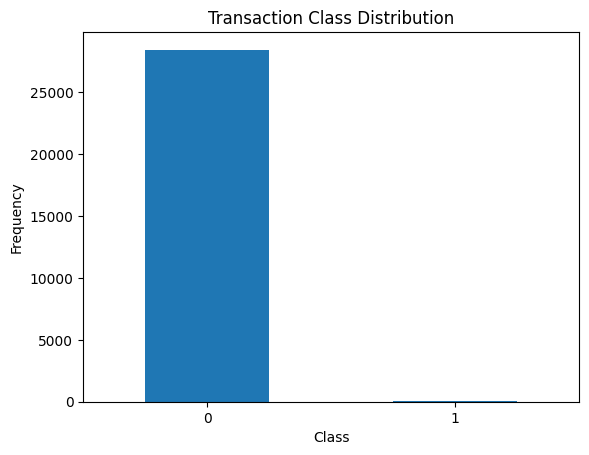

In [141]:
# Class distribution of legit and fraudulent transaction through bar chart
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title ("Transaction Class Distribution")
plt.xlabel('Class')
plt.ylabel("Frequency")

As per the graph we can say the dataset is highly imbalanced

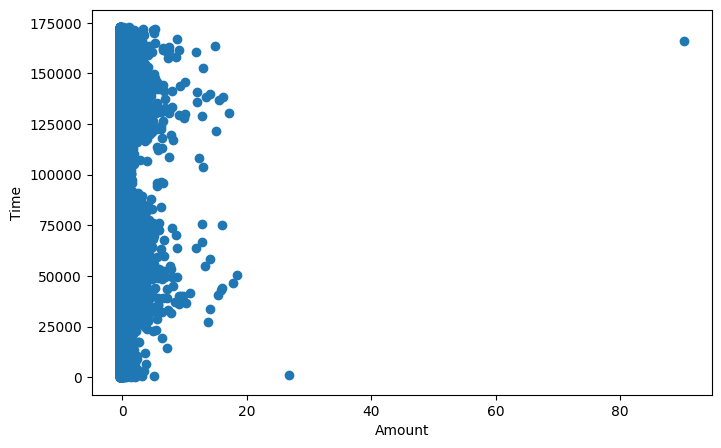

In [142]:
# Outliers detection
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(df['Amount'], df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

**Dealing with imbalaced data :
SMOTE (Synthetic Minority Oversampling Technique)**

In [143]:
# Spliting the data into features & targets
X = df.drop(columns = 'Class', axis = 1)
y = df['Class']

In [144]:
# Fitting SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    28420
1    28420
Name: Class, dtype: int64

In [145]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify = y_sm, random_state = 0)

In [146]:
y_train.value_counts()

0    22736
1    22736
Name: Class, dtype: int64

In [147]:
y_test.value_counts()

1    5684
0    5684
Name: Class, dtype: int64

In [148]:
print(X.shape, X_train.shape, X_test.shape)

(28470, 30) (45472, 30) (11368, 30)


Plotting the correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevent for the prediction.

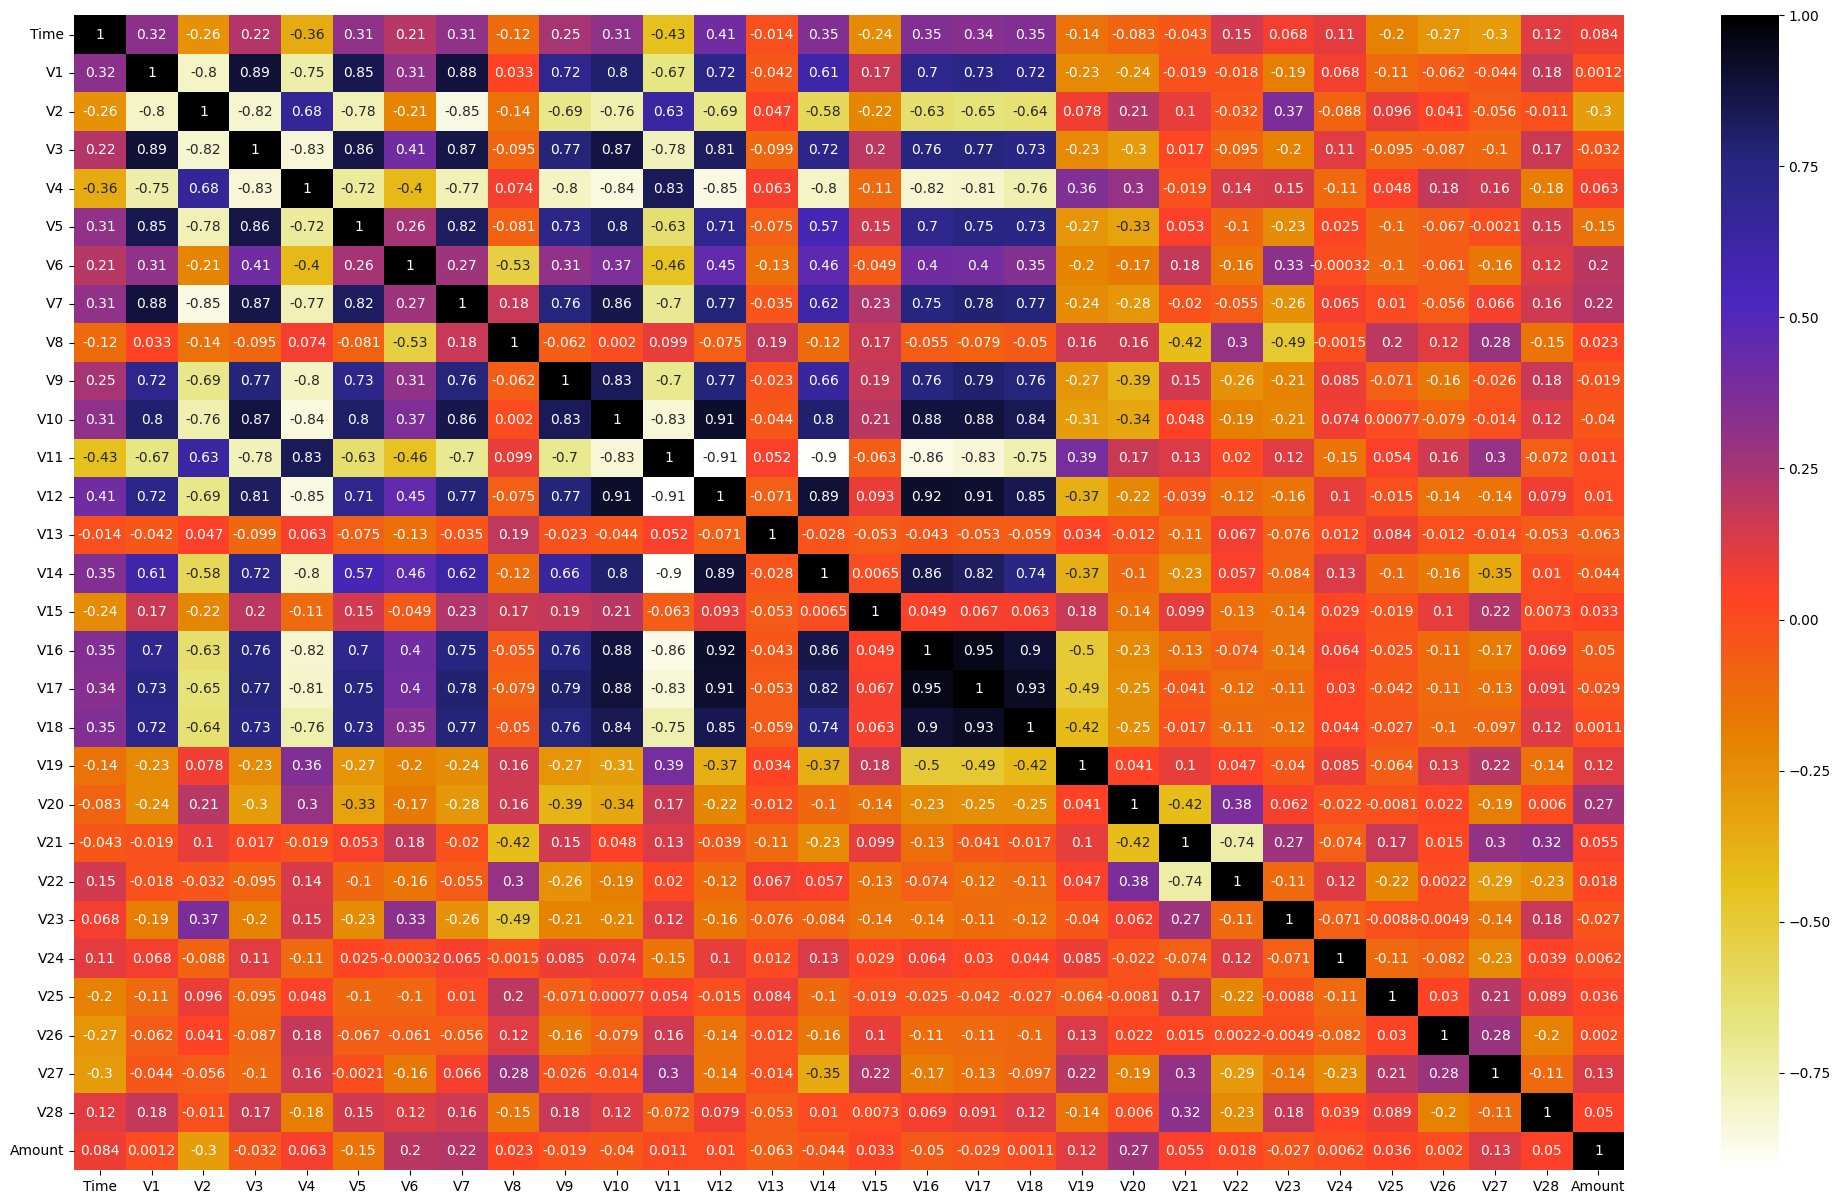

In [149]:
# Using Pearson Correlation
plt.figure(figsize = (25,15))
cor = X_train.corr()
sns.heatmap(cor, annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the data available to us.



In [150]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.13430959, 0.26517165, 0.19551404, 0.41981041, 0.35713138,
       0.21910814, 0.12492055, 0.26684541, 0.16374113, 0.20207359,
       0.48738424, 0.45332494, 0.42833292, 0.03679878, 0.52465603,
       0.02135273, 0.41478498, 0.47203528, 0.23753557, 0.14175259,
       0.15365109, 0.28346895, 0.04705726, 0.16059686, 0.08629291,
       0.02451997, 0.06198119, 0.25150837, 0.17139966, 0.24210203])

In [151]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.524656
V10       0.487384
V17       0.472035
V11       0.453325
V12       0.428333
V3        0.419810
V16       0.414785
V4        0.357131
V21       0.283469
V7        0.266845
V1        0.265172
V27       0.251508
Amount    0.242102
V18       0.237536
V5        0.219108
V9        0.202074
V2        0.195514
V28       0.171400
V8        0.163741
V23       0.160597
V20       0.153651
V19       0.141753
Time      0.134310
V6        0.124921
V24       0.086293
V26       0.061981
V22       0.047057
V13       0.036799
V25       0.024520
V15       0.021353
dtype: float64

<Axes: >

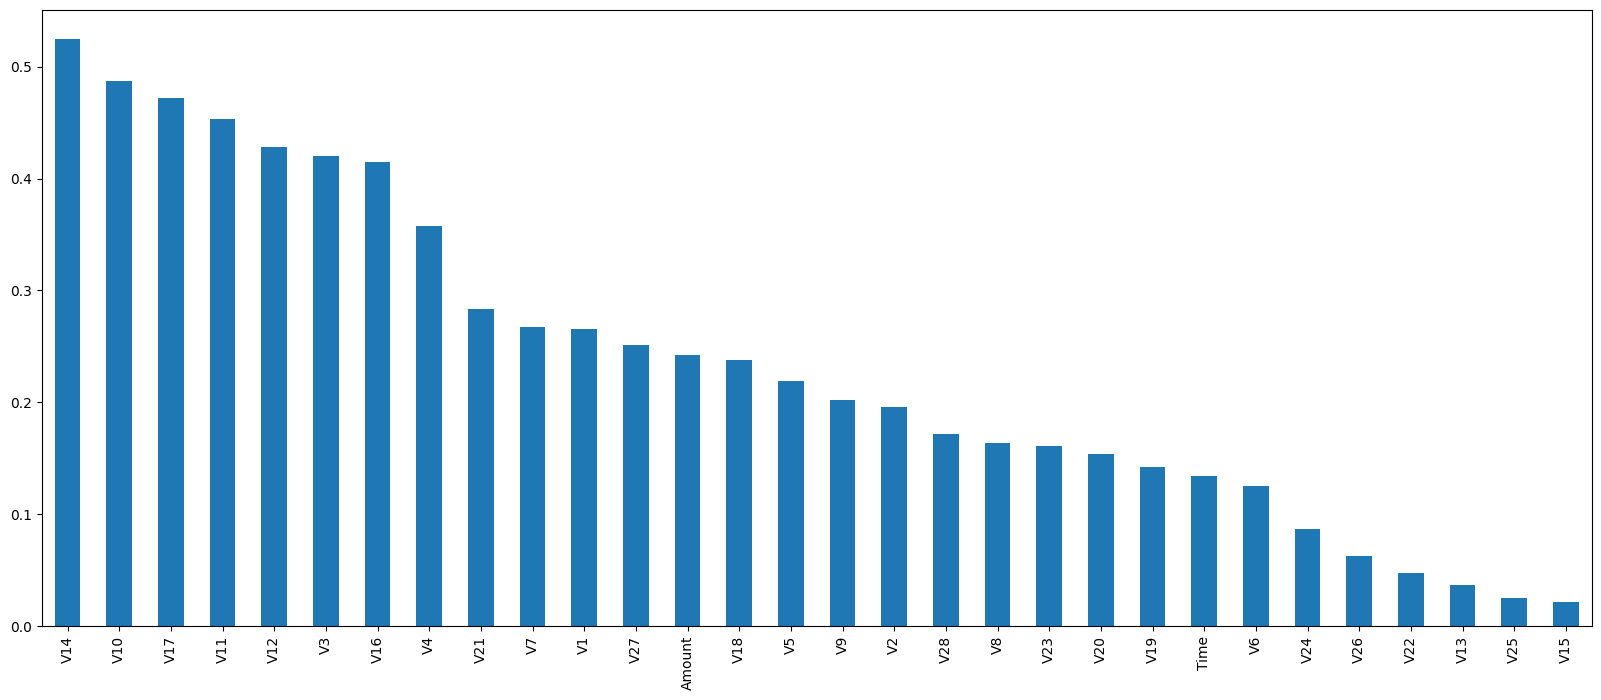

In [152]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20, 8))

In [153]:
sel_ten_cols = SelectKBest(mutual_info_classif, k = 15)
sel_ten_cols.fit(X_train, y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['V1', 'V3', 'V4', 'V5', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V21', 'V27', 'Amount'],
      dtype='object')

In [154]:
features = df[['V18', 'Time', 'V5', 'V6', 'V28', 'V8', 'V20', 'V24', 'V23', 'V19', 'V26', 'V22', 'V25', 'V15', 'V13']]
features

,V18,Time,V5,V6,V28,V8,V20,V24,V23,V19,V26,V22,V25,V15,V13
211148,1.091522,138279.0,0.060284,0.067399,0.101092,0.077467,-0.001871,-0.168331,-0.076673,2.443234,-0.236983,-1.191514,0.412387,-0.420383,-0.411140
188276,0.054154,127899.0,-0.605782,-0.398639,-0.013606,0.058659,0.079625,0.667618,0.129602,0.487817,-0.144249,0.856235,-0.163149,-0.339714,0.203876
262997,0.026994,160750.0,0.840881,-0.752363,-0.358319,-0.471460,0.116752,-0.988657,-0.016847,2.676496,0.611112,0.629972,-0.123182,1.606688,0.686414
253937,0.558111,156501.0,-0.207127,0.079291,-0.255768,-0.075191,0.303248,-0.520234,0.461325,-0.402401,-0.779640,-0.586106,-0.097791,-0.613179,-0.874895
41510,-0.884008,40714.0,0.307625,-0.064800,-0.106760,-0.200879,0.122116,0.433394,-0.236987,0.665830,-0.241458,0.338948,0.074261,0.196299,0.379215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67484,-1.044976,52556.0,-0.516725,0.938475,-0.125807,-6.900616,-1.783095,0.339536,1.132936,-0.449488,0.131487,-2.066480,-0.074440,0.833263,1.090661
229764,-0.656049,146041.0,0.489398,-0.844934,0.056568,-0.251254,-0.026631,0.067445,-0.326033,0.725330,0.467199,-0.663704,0.521917,-0.158120,-0.302360
270093,0.112383,163916.0,0.683205,-0.622592,-0.059735,-0.176054,-0.263737,0.660626,0.091141,-0.162048,-0.643492,0.209039,0.260147,-0.238669,-1.078386
2007,-0.295855,1548.0,0.228730,-1.077180,-0.058954,-0.370690,0.163183,0.722739,0.196547,1.656242,0.344994,-0.473906,-0.031610,1.945284,0.087119


In [155]:
X_train = X_train.drop(features, axis = 1)
X_test = X_test.drop(features, axis = 1)

In [156]:
X_train.shape

(45472, 15)

In [157]:
X_train.head()

,V1,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V21,V27,Amount
5870,-0.791334,1.119830,0.514651,0.997056,0.626252,-1.287258,0.221229,-1.627364,-0.161940,-0.034249,0.678548,-0.222001,0.114682,0.088933,-0.178369
33933,-16.018875,8.912760,-22.847290,11.678494,-16.559034,-6.231203,-12.942791,9.669533,-13.842453,-13.565704,-7.912038,-11.997174,-2.215241,2.116384,-0.304291
40296,-4.805776,0.225851,-4.426355,4.649801,-6.900121,-2.516298,-5.691352,5.798408,-7.717999,-8.582194,-7.313044,-12.132158,0.887838,1.266696,-0.309311
16167,2.031560,-0.017708,-1.700863,1.018734,0.175285,0.451345,0.343680,-1.608492,-0.710288,0.692772,0.196431,-0.776829,0.213209,-0.012737,-0.212614
42693,-1.076922,2.570983,-2.960220,4.334118,1.962640,-2.751964,-2.354044,2.109546,-2.605147,-7.245118,2.198564,6.340944,-0.047342,-0.126158,-0.280235


# **Model Building**
**Model Training**

In [158]:
# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]

In [159]:
# Creating the function for comparing models
def compare_models_train_test():

  for model in models:

    # Training the model
    model.fit(X_train, y_train)

    # Evaluating the model on training data
    train_data_prediction = model.predict(X_train)
    accuracy = accuracy_score(train_data_prediction, y_train)
    print('Accuracy score of the', model, 'on training data =', accuracy)

In [160]:
compare_models_train_test()

Accuracy score of the LogisticRegression(max_iter=1000) on training data = 0.9680682617874736
Accuracy score of the KNeighborsClassifier() on training data = 0.9992083040112597
Accuracy score of the RandomForestClassifier(random_state=0) on training data = 1.0


In [161]:
# Model Evaluation on test data
rf_classifier = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
prediction = rf_classifier.predict(X_test)

In [163]:
print(confusion_matrix(prediction, y_test))
print(accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))

[[5683    0]
 [   1 5684]]
0.9999120337790288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      5685

    accuracy                           1.00     11368
   macro avg       1.00      1.00      1.00     11368
weighted avg       1.00      1.00      1.00     11368



# **Hyperparametertuning**
Comparing the models with different Hyperparameter values using Randomized Search CV

In [103]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [15, 20, 25, 30]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20, 30]

# Create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy', 'gini']}
print(random_grid)

{'n_estimators': [800, 933, 1066, 1200, 1333, 1466, 1600, 1733, 1866, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 20, 25, 30], 'min_samples_split': [2, 5, 8], 'min_samples_leaf': [10, 20, 30], 'criterion': ['entropy', 'gini']}


In [104]:
# Fitting the randomizedsearchcv
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 5, verbose = 2, random_state = 2, n_jobs = -1)
rf_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 20, 30],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [800, 933, 1066, 1200,
                                                         1333, 1466, 1600, 1733,
                                                         1866, 2000]},
                   random_state=2, verbose=2)

In [109]:
# These are the best parameters
rf_randomcv.best_params_

{'n_estimators': 1066,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [110]:
# The best estimators
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_leaf=10, min_samples_split=8,
                       n_estimators=1066)

In [111]:
# Storing the best estimators in a variable
best_random_grid = rf_randomcv.best_estimator_

In [113]:
# Evaluating the hyperparameters
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))
print("Classification Report {}".format(classification_report(y_test, y_pred)))

[[5682    2]
 [   4 5679]]
Accuracy Score 0.9994721562417525
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       1.00      1.00      1.00      5683

    accuracy                           1.00     11367
   macro avg       1.00      1.00      1.00     11367
weighted avg       1.00      1.00      1.00     11367



# **Save Model**

In [164]:
# Saving the model as pickle file
pickle.dump(rf_classifier, open('model_save', 'wb'))

In [165]:
# Loading the pickle file for prediction
md = pickle.load(open('/content/model_save', 'rb'))

In [166]:
# Creating a customized transaction
transaction_data = pd.DataFrame({
    'V1' : [-1.951398],
    'V2' : [-1.215899],
    'V3' : [3.550661],
    'V4' : [0.857529],
    'V7' : [-1.651177],
    'V9' : [1.120133],
    'V10'	: [-0.940735],
    'V11' : [0.313347],
    'V12'	: [1.082311	],
    'V14'	: [-0.945211],
    'V16' : [-0.666436],
    'V17'	: [0.419927],
    'V21'	: [0.340890],
    'V27' : [0.120507],
    'Amount' : [-0.364462]
    })

In [167]:
# Customized Prediction
new_predictions = md.predict(transaction_data)
if new_predictions == 1:
    print('Prediction: Fraudulent Transaction')
else :
    print('Prediction : Genuine Transaction')

Prediction : Genuine Transaction
